<a href="https://colab.research.google.com/github/student-ganesh/ganesh-demo/blob/main/CODSOFT_PRO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA LOADING

In [10]:
import pandas as pd

# Load the CSV file with 'ISO-8859-1' encoding to handle special characters
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Show the first few rows to verify it's loaded correctly
print(df.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [12]:
print(df.describe())
print(df.info())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


DATA PREPROCESSIG

In [14]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [15]:
# Fill missing ratings with the mean of the ratings column
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Drop rows where any critical feature like Genre, Director, or Actor is missing
df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

# Check again for missing values after handling
print(df.isnull().sum())



Name           0
Year         282
Duration    4839
Genre          0
Rating         0
Votes       3809
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64


<ipython-input-15-358651ee547e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


FEATURE SEECTION

In [16]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Rating', 'Name'])  # Drop the 'Name' column as it's not useful for prediction
y = df['Rating']  # Target variable is Rating

# Check the shapes of X and y
print(X.shape, y.shape)


(11368, 8) (11368,)


TRAIN_TEST_SPLIT

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(9094, 8) (2274, 8) (9094,) (2274,)


In [28]:
def convert_monetary_value(value):
    """
    Function to convert monetary values from formats like '$5.16M', '$1.5K' into numeric values.
    """
    if isinstance(value, str):
        # Remove dollar sign and commas
        value = value.replace('$', '').replace(',', '')

        # Check if 'M' (million) is in the value
        if 'M' in value:
            value = float(value.replace('M', '')) * 1e6
        # Check if 'K' (thousand) is in the value
        elif 'K' in value:
            value = float(value.replace('K', '')) * 1e3
        else:
            value = float(value)  # If no 'M' or 'K', just convert directly
    return value


MODEL BUILDING

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example: Load your dataset
# df = pd.read_csv('your_data.csv')  # Replace with your actual data loading method

# Assuming the dataframe `df` has the columns you listed
X = df.drop('Rating', axis=1)  # Drop 'Rating' as the target variable (adjust target if different)
y = df['Rating']  # Assuming 'Rating' is the target variable

# Clean column names by stripping extra spaces
X.columns = X.columns.str.strip()

# 1. Clean the 'Year' and 'Duration' columns if necessary
X['Year'] = X['Year'].replace(r'\D', '', regex=True).astype(float)  # Remove non-digits from 'Year'

# Clean 'Duration' column: Remove non-numeric characters (like ' min') and convert to float
X['Duration'] = X['Duration'].replace({',': '', ' min': ''}, regex=True).astype(float)  # Removing commas and ' min'

# 2. Clean the 'Votes' column: Remove commas and dollar sign, and convert to float
def convert_monetary_value(value):
    """
    Function to convert monetary values from formats like '$5.16M', '$1.5K' into numeric values.
    """
    if isinstance(value, str):
        # Remove dollar sign and commas
        value = value.replace('$', '').replace(',', '')

        # Check if 'M' (million) is in the value
        if 'M' in value:
            value = float(value.replace('M', '')) * 1e6
        # Check if 'K' (thousand) is in the value
        elif 'K' in value:
            value = float(value.replace('K', '')) * 1e3
        else:
            value = float(value)  # If no 'M' or 'K', just convert directly
    return value

# Apply conversion to 'Votes' column
X['Votes'] = X['Votes'].apply(convert_monetary_value)

# 3. Handle monetary columns (e.g., Revenue, Budget, Profit)
monetary_cols = ['Revenue', 'Budget', 'Profit']  # Replace with your actual monetary columns

for col in monetary_cols:
    if col in X.columns:
        X[col] = X[col].apply(convert_monetary_value)
    else:
        print(f"Column {col} is missing from the DataFrame.")

# 4. Handle categorical features: 'Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
# Convert these columns using LabelEncoder or One-Hot Encoding
categorical_cols = ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Apply Label Encoding for categorical variables (or One-Hot Encoding for more complex cases)
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and train the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = regressor.predict(X_test)

# 8. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 9. Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Column Revenue is missing from the DataFrame.
Column Budget is missing from the DataFrame.
Column Profit is missing from the DataFrame.
Mean Squared Error: 0.7641437505834457
R-squared: 0.3712620635340276


MODEL EVALUATION

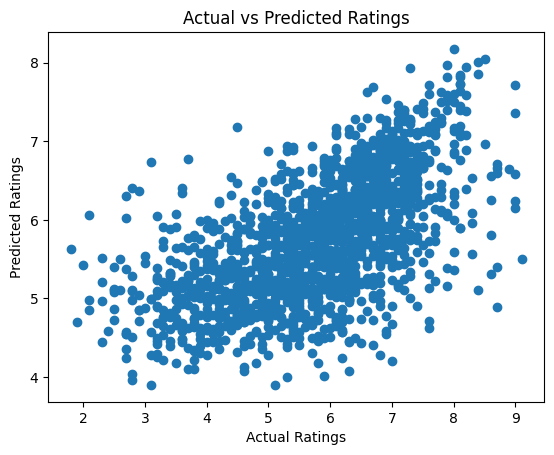

In [32]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


HYPERPARAMETER TUNING

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the random hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with a limited number of iterations
randomized_search = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')

# Fit the model
randomized_search.fit(X_train, y_train)

# Output the best parameters
print(f"Best parameters found: {randomized_search.best_params_}")


Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
